In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# loading the dataset
dataset = data = pd.read_csv(r'C:\Users\ZED\Desktop\varsha\Wine_clust.csv')
 
# printing first five rows of the dataset
dataset.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# printing the shape of dataset
dataset.shape
 
# checking for any
# null values present
dataset.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
# extracting values from two
# columns for clustering
dataset_new = dataset[['Alcohol',
                       'Malic_Acid']].values

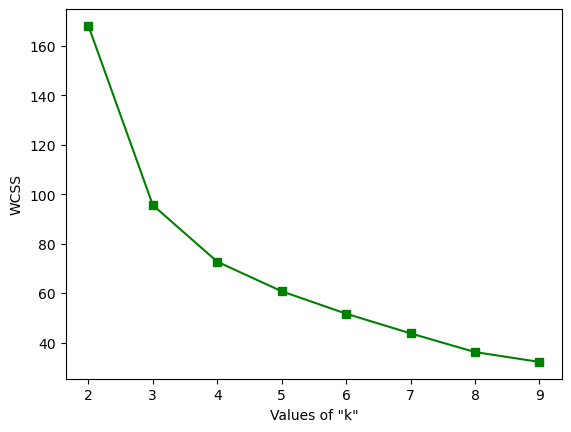

In [6]:
# determining the maximum number of clusters
# using the simple method
limit = int((dataset_new.shape[0]//2)**0.5)
 
# selecting optimal value of 'k'
# using elbow method
 
# wcss - within cluster sum of
# squared distances
wcss = {}
 
for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataset_new)
    wcss[k] = model.inertia_
     
# plotting the wcss values
# to find out the elbow value
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

In [8]:
# determining the maximum number of clusters
# using the simple method
limit = int((dataset_new.shape[0]//2)**0.5)
 
# determining number of clusters
# using silhouette score method
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataset_new)
    pred = model.predict(dataset_new)
    score = silhouette_score(dataset_new, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 2: 0.477
Silhouette Score for k = 3: 0.481
Silhouette Score for k = 4: 0.455
Silhouette Score for k = 5: 0.446
Silhouette Score for k = 6: 0.381
Silhouette Score for k = 7: 0.431
Silhouette Score for k = 8: 0.383
Silhouette Score for k = 9: 0.391


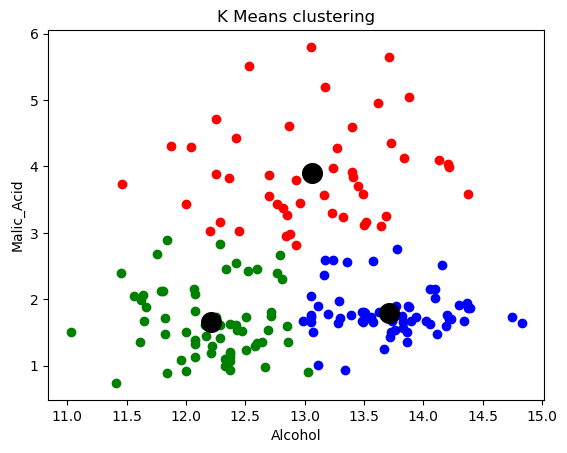

In [11]:
# clustering the data using Kmeans
# using k = 3
model = KMeans(n_clusters=3)
 
# predicting the clusters
pred = model.fit_predict(dataset_new)
 
# plotting all the clusters
colours = ['red', 'blue', 'green']
 
for i in np.unique(model.labels_):
    plt.scatter(dataset_new[pred==i, 0],
                dataset_new[pred==i, 1],
                c = colours[i])
     
# plotting the cluster centroids
plt.scatter(model.cluster_centers_[:, 0],
            model.cluster_centers_[:, 1],
            s = 200,  # marker size
            c = 'black')
 
plt.title('K Means clustering')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.show()